## Packages

In [211]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


## Importing Data

##### Importing Data

For each train, test, and valid data that exists, I convert each example into an X and y pytorch tensor
that will be used for training and testing

In [212]:
from sklearn.preprocessing import StandardScaler

def convert_df_to_tensors(df, scaler):
  y = torch.tensor(df['label'].to_numpy(), dtype=torch.long)
  X = torch.tensor(scaler.transform(df.drop(columns=['label']).to_numpy()), dtype=torch.float32)
  return X, y

""" Center Surround Data """
center_surround_scaler = StandardScaler()
center_surround_train_df = pd.read_csv("./center_surround_train.csv")
center_surround_test_df = pd.read_csv("./center_surround_test.csv")
center_surround_valid_df = pd.read_csv("./center_surround_valid.csv")
center_surround_scaler.fit(center_surround_train_df.drop(columns=['label']).to_numpy())
center_surround_train_X, center_surround_train_y = convert_df_to_tensors(center_surround_train_df, center_surround_scaler)
center_surround_test_X, center_surround_test_y = convert_df_to_tensors(center_surround_test_df, center_surround_scaler)
center_surround_valid_X, center_surround_valid_y = convert_df_to_tensors(center_surround_valid_df, center_surround_scaler)

""" Spiral Data """
spiral_scaler = StandardScaler()
spiral_train_df = pd.read_csv("./spiral_train.csv")
spiral_test_df = pd.read_csv("./spiral_test.csv")
spiral_valid_df = pd.read_csv("./spiral_valid.csv")
spiral_scaler.fit(spiral_train_df.drop(columns=['label']).to_numpy())
spiral_train_X, spiral_train_y = convert_df_to_tensors(spiral_train_df, spiral_scaler)
spiral_test_X, spiral_test_y = convert_df_to_tensors(spiral_test_df, spiral_scaler)
spiral_valid_X, spiral_valid_y = convert_df_to_tensors(spiral_valid_df, spiral_scaler)


""" Two Gaussians Data """
two_gaussians_scaler = StandardScaler()
two_gaussians_train_df = pd.read_csv("./two_gaussians_train.csv")
two_gaussians_test_df = pd.read_csv("./two_gaussians_test.csv")
two_gaussians_valid_df = pd.read_csv("./two_gaussians_valid.csv")
two_gaussians_scaler.fit(two_gaussians_train_df.drop(columns=['label']).to_numpy())
two_gaussians_train_X, two_gaussians_train_y = convert_df_to_tensors(two_gaussians_train_df, two_gaussians_scaler)
two_gaussians_test_X, two_gaussians_test_y = convert_df_to_tensors(two_gaussians_test_df, two_gaussians_scaler)
two_gaussians_valid_X, two_gaussians_valid_y = convert_df_to_tensors(two_gaussians_valid_df, two_gaussians_scaler)


""" XOR Data """
xor_scaler = StandardScaler()
xor_train_df = pd.read_csv("./xor_train.csv")
xor_test_df = pd.read_csv("./xor_test.csv")
xor_valid_df = pd.read_csv("./xor_valid.csv")
xor_scaler.fit(xor_train_df.drop(columns=['label']).to_numpy())
xor_train_X, xor_train_y = convert_df_to_tensors(xor_train_df, xor_scaler)
xor_test_X, xor_test_y = convert_df_to_tensors(xor_test_df, xor_scaler)
xor_valid_X, xor_valid_y = convert_df_to_tensors(xor_valid_df, xor_scaler)

In [213]:
print(center_surround_train_X[:5])
print(center_surround_train_y[:5])

tensor([[-1.3685,  1.5436],
        [ 0.1348, -0.3581],
        [-1.1740,  2.0547],
        [ 0.1221, -0.3837],
        [-0.0810, -1.5381]])
tensor([1, 0, 1, 0, 1])


## Data Exploration

##### Spiral Data

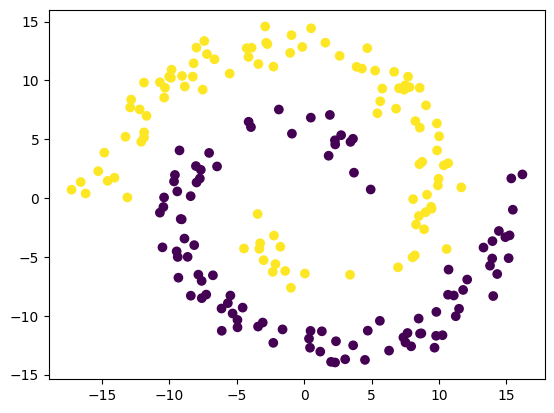

In [214]:
plt.scatter(spiral_train_df['x1'], spiral_train_df['x2'], c=spiral_train_df['label'])
plt.show()

##### Center Surround Data

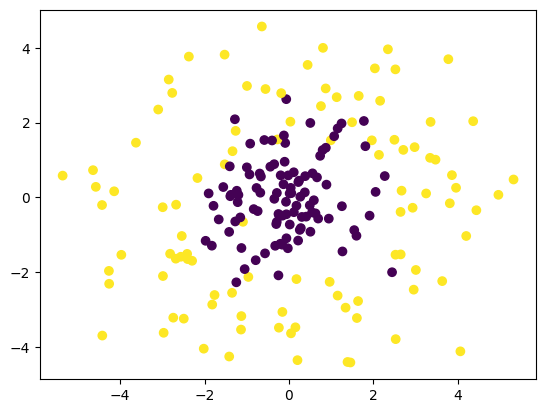

In [215]:
plt.scatter(center_surround_train_df['x1'], center_surround_train_df['x2'], c=center_surround_train_df['label'])
plt.show()

##### Two Gaussian Data

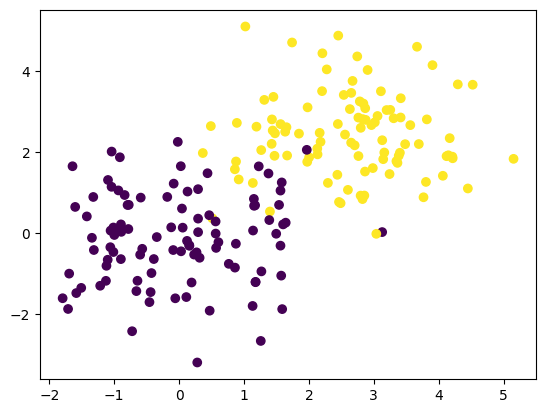

In [216]:
plt.scatter(two_gaussians_train_df['x1'], two_gaussians_train_df['x2'], c=two_gaussians_train_df['label'])
plt.show()

##### XOR Data

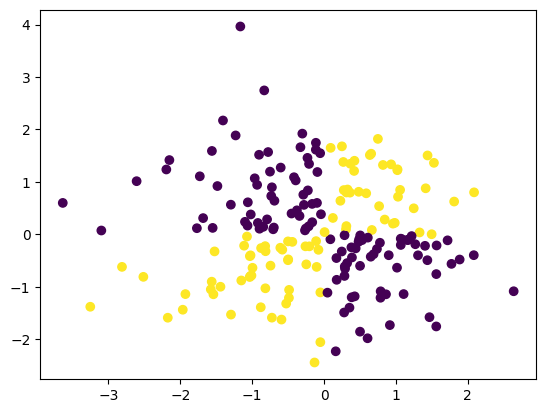

In [217]:
plt.scatter(xor_train_df['x1'], xor_train_df['x2'], c=xor_train_df['label'])
plt.show()

## Modeling

##### Neural Network

In [218]:
class SimpleModel(nn.Module):
  def __init__(self, hidden_n):
    super(SimpleModel, self).__init__()
    self.hidden = nn.Linear(2, hidden_n)
    self.output = nn.Linear(hidden_n, 2)

  def forward(self, x):
    x = torch.sigmoid(self.hidden(x))
    x = self.output(x)
    return x

##### Training and Testing the models

In [219]:
def train_model(X, y, test_X, test_y, hidden_nodes=8, learning_rate=0.01):
  model = SimpleModel(hidden_n=hidden_nodes)
  model.train()
  loss_func = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  epochs = 1000
  for epoch in range(epochs):
    optimizer.zero_grad()
    logits = model(X)
    loss = loss_func(logits, y)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      test_logits = model(test_X)
      test_loss = loss_func(test_logits, test_y)

      if (epoch + 1) % 250 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}]  |  Train Loss: {loss.item():.3f}  |  Test Loss: {test_loss.item():.3f}  ")



# def test_model(model, X, y):
#   model.eval()
#   loss_func = nn.CrossEntropyLoss()

#   with torch.no_grad():
#     logits = model(X)
#     loss = loss_func(logits, y)
#     print(f"Test Loss: {loss.item():.3f}")




In [220]:
print("Center Surround")
print("------------------------------------")
train_model(center_surround_train_X, center_surround_train_y, center_surround_test_X, center_surround_test_y)
print()


print("Spiral Data")
print("------------------------------------")
train_model(spiral_train_X, spiral_train_y, spiral_test_X, spiral_test_y)
print()

print("Two Gaussians Data")
print("------------------------------------")
train_model(two_gaussians_train_X, two_gaussians_train_y, two_gaussians_test_X, two_gaussians_test_y)
print()

print("XOR Data")
print("------------------------------------")
train_model(xor_train_X, xor_train_y, xor_test_X, xor_test_y)
print()

Center Surround
------------------------------------
Epoch [250/1000]  |  Train Loss: 0.249  |  Test Loss: 0.537  
Epoch [500/1000]  |  Train Loss: 0.188  |  Test Loss: 0.654  
Epoch [750/1000]  |  Train Loss: 0.168  |  Test Loss: 0.771  
Epoch [1000/1000]  |  Train Loss: 0.160  |  Test Loss: 0.840  

Spiral Data
------------------------------------
Epoch [250/1000]  |  Train Loss: 0.465  |  Test Loss: 0.437  
Epoch [500/1000]  |  Train Loss: 0.460  |  Test Loss: 0.432  
Epoch [750/1000]  |  Train Loss: 0.324  |  Test Loss: 0.263  
Epoch [1000/1000]  |  Train Loss: 0.179  |  Test Loss: 0.121  

Two Gaussians Data
------------------------------------
Epoch [250/1000]  |  Train Loss: 0.121  |  Test Loss: 0.184  
Epoch [500/1000]  |  Train Loss: 0.120  |  Test Loss: 0.186  
Epoch [750/1000]  |  Train Loss: 0.120  |  Test Loss: 0.185  
Epoch [1000/1000]  |  Train Loss: 0.119  |  Test Loss: 0.184  

XOR Data
------------------------------------
Epoch [250/1000]  |  Train Loss: 0.352  |  Tes